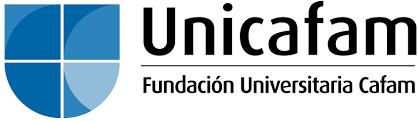


**Proyecto Final**

CURSO DE PYTHON

DIRECCION DE EDUCACIÓN CONTINUA

FUNDACION UNIVERSITARIA CAFAM

DOCENTE: NICOLAS MOJICA GOMEZ

ESTUDIANTE: **Ronnie Cristancho**


---


In [10]:
import pandas as pd

In [20]:
dataset = pd.read_csv("/content/sample_data/crime_data.csv")
print (dataset.head())

   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


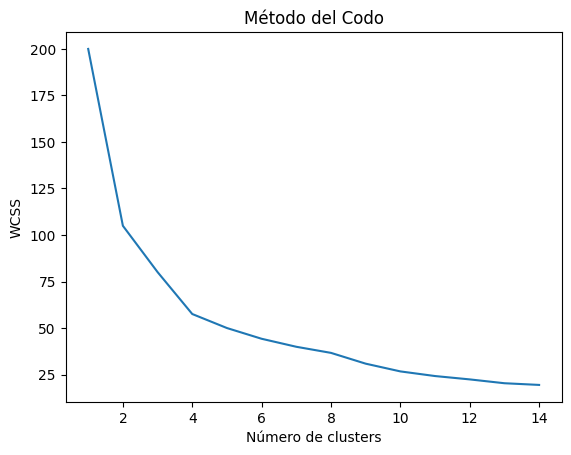

In [31]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

features = dataset[["Murder", "Assault", "UrbanPop", "Rape"]]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

from sklearn.preprocessing import StandardScaler

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss)
plt.title("Método del Codo")
plt.xlabel("Número de clusters")
plt.ylabel("WCSS")
plt.show()

In [32]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
dataset["Cluster"] = kmeans.fit_predict(scaled_features)

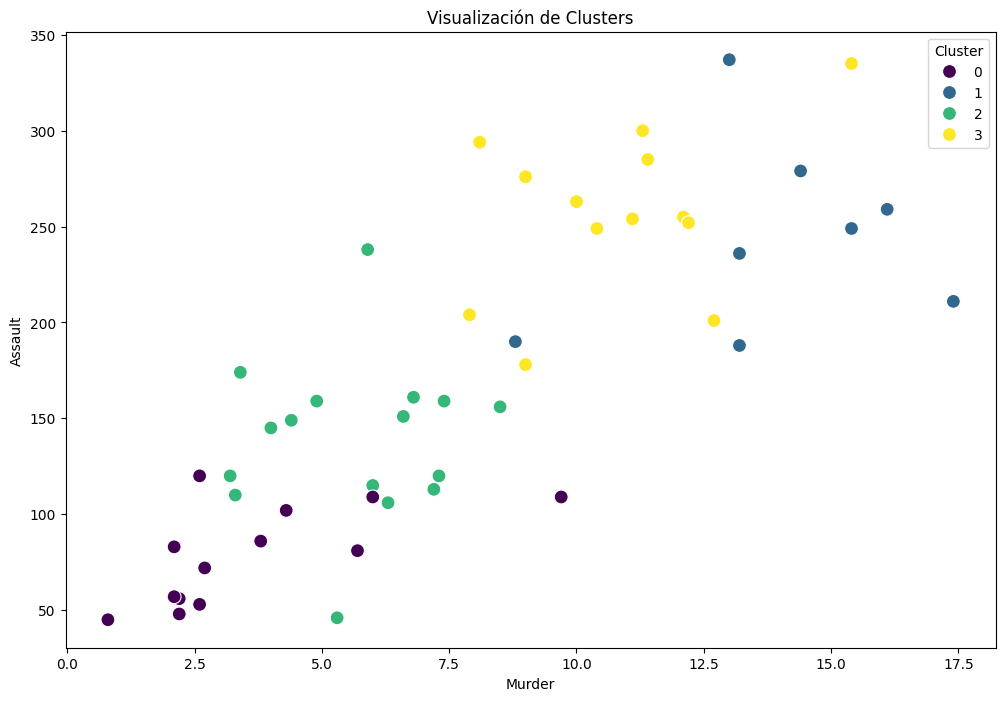

In [33]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(x=dataset["Murder"], y=dataset["Assault"], hue=dataset["Cluster"], palette="viridis", s=100)
plt.title("Visualización de Clusters")
plt.xlabel("Murder")
plt.ylabel("Assault")
plt.legend(title="Cluster")
plt.show()